<a href="https://colab.research.google.com/github/Ekansh0801/90-DAYS-OF-MACHINE-LEARNING/blob/main/DAY_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Linear Regression

### Building Linear Regression

In [9]:
# importing numpy library
import numpy as np

### **Linear Regression**

In [33]:

class Linear_Regression():

  # initiating the parameter(learning rate and no of iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    # number of training examples and number of features
    self.m,self.n = X.shape  # number of rows and columns

    # initiating the weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing the gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_prediction = self.predict(self.X)

    # calculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating weight and bias
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w) + self.b


### Using Linear Regression model for Prediction

In [11]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Data Preprocessing

In [12]:
# importing the data from csv to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [13]:
# printing the first 5 rows of dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
# printing the last 5 rows of dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [15]:
# number of rows and columns in dataframe
salary_data.shape

(30, 2)

In [16]:
# check for any missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


### splitting the feature and target

In [24]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [25]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [26]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


### spliting the data into training data and testing data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

### Training the Linear Regression Model

In [34]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [35]:
model.fit(X_train,Y_train)

In [38]:
# printing model parameters
print('weight= ',model.w[0])
print('bias = ',model.b)

weight=  9514.400999035135
bias =  23697.406507136307


### salary = 9514(experience) + 23697

### Predict the salary for test data

In [39]:
test_data_prediction = model.predict(X_test)

In [40]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


### Visualizing the predicted values and actual values

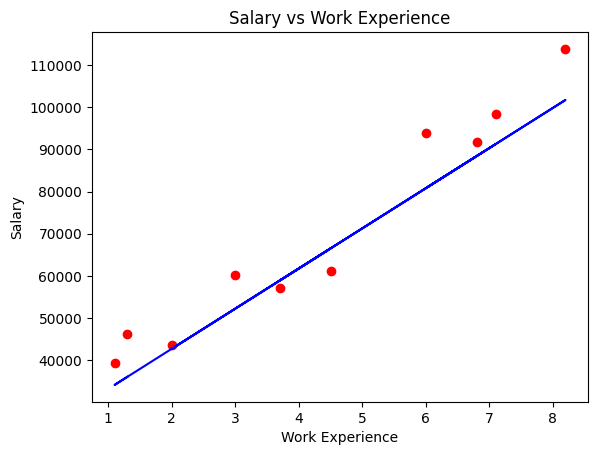

In [43]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()